In [11]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

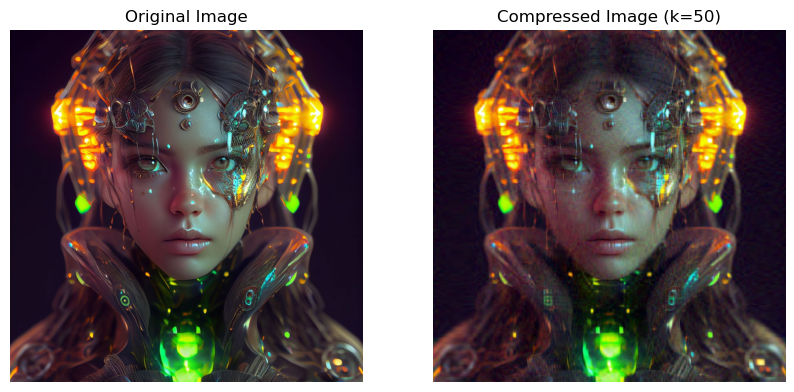

In [12]:
def svd_compression(image_path, k):

    # Read the image in color

    img = cv2.imread('/Users/Dataghost/Master-X-DL/claude.jpg')

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct visualization
    
    # Split the image into R, G, B channels
    
    R, G, B = cv2.split(img)


# Function to apply SVD and reconstruct the image with k singular values

    def compress_channel(channel, k):
        
        U, S, Vt = np.linalg.svd(channel, full_matrices=False)

        S_k = np.diag(S[:k])  # Keep only the top-k singular values

        U_k = U[:, :k]

        Vt_k = Vt[:k, :]

        return np.dot(U_k, np.dot(S_k, Vt_k))

    
    # Apply SVD compression to each channel
    R_compressed = compress_channel(R, k)
    G_compressed = compress_channel(G, k)
    B_compressed = compress_channel(B, k)
    
    # Stack the compressed channels back into an image
    compressed_img = np.stack([R_compressed, G_compressed, B_compressed], axis=2)
    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)
    
    # Plot original and compressed images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    axes[1].imshow(compressed_img)
    axes[1].set_title(f"Compressed Image (k={k})")
    axes[1].axis("off")
    
    plt.show()
    
# Example usage
image_path = "/Users/Dataghost/Master-X-DL/claude.jpg"  # Replace with your image path
k = 50  # Number of singular values to keep
svd_compression(image_path, k) 